In [60]:
#Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
import seaborn as sns
rcParams['figure.figsize']=10,8

In [61]:
#Load Dataset
df = pd.read_csv(r'c:/Python/HousingClean1.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
1,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
2,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished
3,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
4,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished


In [63]:
data = df[['price','area','mainroad', 'bedrooms','bathrooms']]
data.head()

,price,area,mainroad,bedrooms,bathrooms
0,1750000,3620,yes,2,1
1,1750000,2910,no,3,1
2,1750000,3850,yes,3,1
3,1767150,2400,no,3,1
4,1820000,3000,yes,2,1


In [64]:
#Show Key Statistics
data.describe()

,price,area,bedrooms,bathrooms
count,5.290000e+02,529.000000,529.000000,529.000000
mean,4.592158e+06,5058.610586,2.941399,1.258979
std,1.585562e+06,2076.332676,0.729756,0.463681
min,1.750000e+06,1650.000000,1.000000,1.000000
25%,3.430000e+06,3540.000000,2.000000,1.000000
50%,4.270000e+06,4500.000000,3.000000,1.000000
75%,5.600000e+06,6300.000000,3.000000,1.000000
max,9.100000e+06,15600.000000,6.000000,3.000000


In [67]:
dataset = pd.get_dummies(data=data)

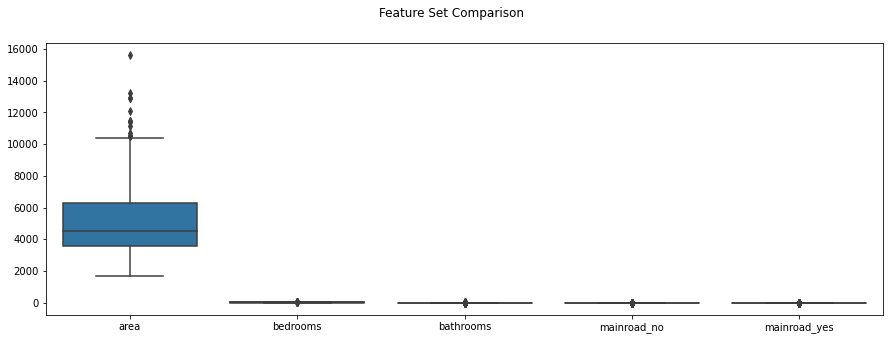

In [68]:
#BoxPlot Feature Set Comparison
fig = plt.figure(figsize=(15,5))
fig.suptitle('Feature Set Comparison')
ax = fig.add_subplot(111)
sns.boxplot(data=dataset.drop('price',axis=1))
plt.show()

In [69]:
#Correlation Columns with Output
cor = dataset.corr()
cor_target = abs(cor['price'])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.8]
relevant_features.sort_values(ascending=False)

price    1.0
Name: price, dtype: float64

In [70]:
#Find Independent Column Correlations
def correlation(dataset,threshold):
    col_corr= [] # List of correlated columns
    corr_matrix=dataset.corr() #finding correlation between columns
    for i in range (len(corr_matrix.columns)): #Number of columns
        for j in range (i):
            if abs(corr_matrix.iloc[i,j])>threshold: #checking correlation between colum
                colName=(corr_matrix.columns[i], corr_matrix.columns[j]) #getting corre
                col_corr.append(colName) #adding correlated column name
    return col_corr #returning set of column names
col=correlation(data2,0.8)
print('Correlated columns @ 0.8:', col)

Correlated columns @ 0.8: []


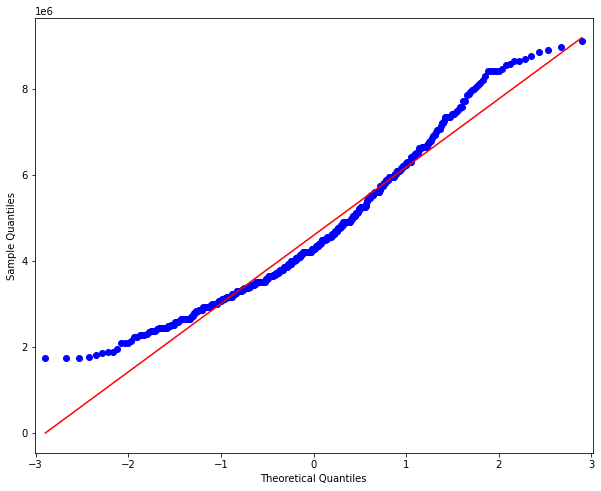

In [71]:
#Create Q-Q Plot
from statsmodels.graphics.gofplots import qqplot
import pylab
qqplot(data2['price'],line='s')
pylab.show()

In [73]:
#Normality test - Shapiro-Wilk Test
# p <= alpha(0.05): reject H0, not normal.
# p > alpha(0.05): fail to reject H0, normal.
from scipy.stats import shapiro
stat, p = shapiro(dataset['price'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.959, p=0.000
Sample does not look Gaussian (reject H0)


In [74]:
#Create Standard Model
#Define x and y variable
x = dataset.drop('price',axis=1).to_numpy()
y = dataset['price'].to_numpy()
#Create Train and Test Datasets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)
#Scale the Data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train2 = sc.fit_transform(x_train)
x_test2 = sc.transform(x_test)
#Model
from sklearn.linear_model import LinearRegression

In [76]:
#Create Model

from sklearn import metrics

for name,method in [('Linear regression', LinearRegression())]: 
    method.fit(x_train2,y_train)
    predict = method.predict(x_test2)

print('\nOriginal Model')
print('\nMethod: {}'.format(name))   

#Coefficents
print('\nIntercept: {:.2f}'.format(float(method.intercept_)))
coeff_table=pd.DataFrame(np.transpose(method.coef_),dataset.drop('price',axis=1).columns,columns=['Coefficients'])
print(coeff_table)
    
#R2,MAE,MSE and RMSE
print('\nR2: {:.2f}'.format(metrics.r2_score(y_test,predict)))
adjusted_r_squared = 1-(1-metrics.r2_score(y_test,predict))*(len(y)-1)/(len(y)-x.shape[1]-1)
print('Adj_R2: {:0.2f}'.format(adjusted_r_squared))
print('Mean Absolute Error: {:.2f}'.format(metrics.mean_absolute_error(y_test, predict)))  
print('Mean Squared Error: {:.2f}'.format(metrics.mean_squared_error(y_test, predict)))  
print('Root Mean Squared Error: {:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, predict)))) 


Original Model

Method: Linear regression

Intercept: 4570147.26
               Coefficients
area          635863.459848
bedrooms      268292.507245
bathrooms     524259.024590
mainroad_no  -144014.133068
mainroad_yes  144014.133068

R2: 0.44
Adj_R2: 0.43
Mean Absolute Error: 940998.99
Mean Squared Error: 1443046504402.59
Root Mean Squared Error: 1201268.71


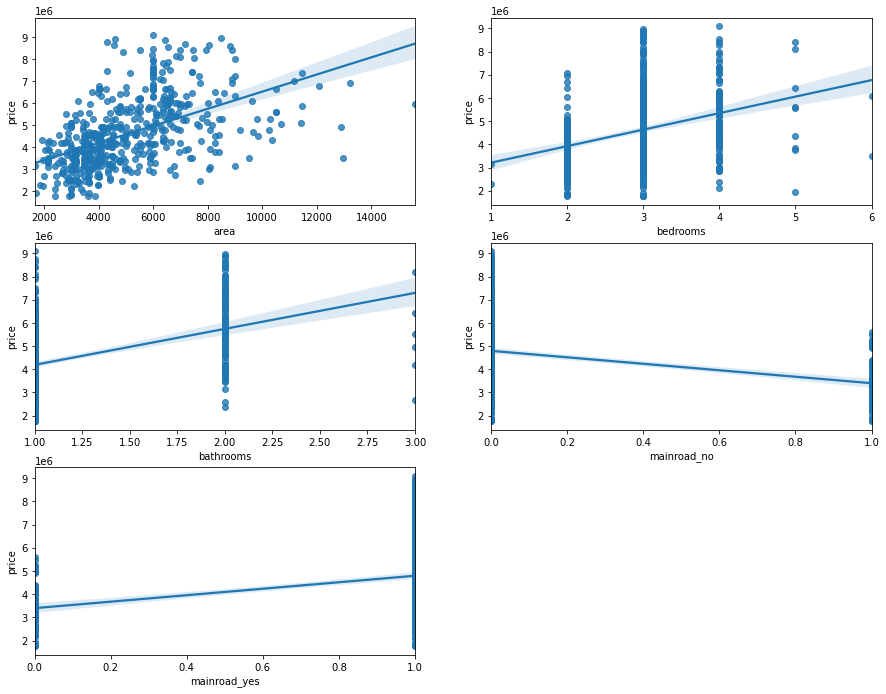

In [79]:
#Scatterplots - PRICE vs. Independent Variables
plt.figure(figsize = (15, 20))
cnt = 1
for col in dataset.columns:
    if (col == 'price'):
        continue
        
    plt.subplot(5, 2, cnt)
    lmgraph = sns.regplot(x = dataset[col], y = dataset.price)
    lmgraph.set_xlabel(col)
    lmgraph.set_ylabel('price')
    cnt += 1

In [80]:
# Construct some pipelines 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

#Create Pipeline

pipeline =[]

pipe_lm = Pipeline([('scl', StandardScaler()),
                    ('clf', LinearRegression())])
pipeline.insert(0,pipe_lm)

# Set grid search params 

modelpara =[]

param_gridlm = {'clf__fit_intercept':[True,False],
                'clf__copy_X':[True, False]}
modelpara.insert(0,param_gridlm)

In [95]:
#Create Learning Curve
from sklearn.model_selection import learning_curve

def plot_learning_curves(model):
    train_sizes, train_scores, test_scores = learning_curve(estimator=model,
                                                            X=x_train, 
                                                            y=y_train,
                                                            train_sizes=np.linspace(.1,1,10),
                                                            scoring = 'neg_mean_squared_error',
                                                            cv=10,random_state=100)
    
    train_mean = np.sqrt(np.mean(-train_scores, axis=1))
    train_std = np.sqrt(np.std(-train_scores, axis=1))
    test_mean = np.sqrt(np.mean(-test_scores, axis=1))
    test_std = np.sqrt(np.std(-test_scores, axis=1))
    
    plt.plot(train_sizes, train_mean,color='blue', marker='o', 
             markersize=5, label='training accuracy')
    plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std,
                     alpha=0.15, color='blue')

    plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5,
             label='validation accuracy')
    plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std,
                     alpha=0.15, color='green')
    plt.grid()
    plt.xlabel('Number of training samples')
    plt.ylabel('RMSE')
    plt.legend(loc='best')
    plt.ylim([300000,1000000])
    plt.show()

LM Learning Curve


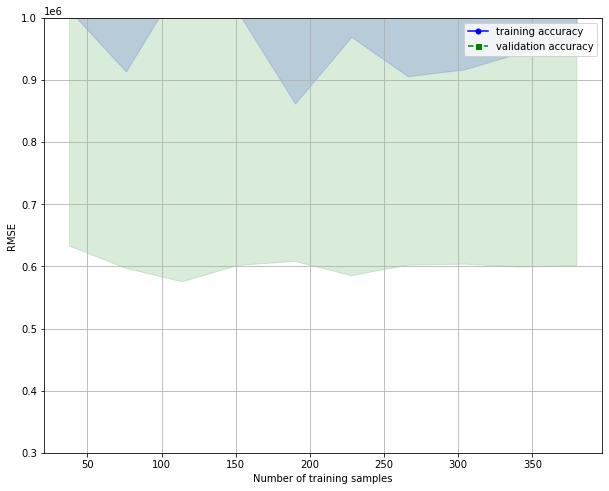

In [96]:
#Plot Learning Curve
lm=LinearRegression()
print('LM Learning Curve')
plot_learning_curves(pipe_lm)

In [101]:
#Bias and Variance
from mlxtend.evaluate import bias_variance_decomp

#Script for Bias Variance
print('Bias Variance Trade-Off')
for name,method in[('Multi-Regression',pipe_lm)]:        
    avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
        method, x_train2, y_train, x_test2, y_test, 
        loss='mse',
        random_seed=100)
    print('\nEstimator: {}'.format(name)) 
    print('Average Bias: {:.2f}'.format(avg_bias))
    print('Average Variance: {:.2f}'.format(avg_var))  

Bias Variance Trade-Off

Estimator: Multi-Regression
Average Bias: 1443496921558.96
Average Variance: 20506204266.79


Model Evaluation - RMSE
Linear Regression 1170328.41




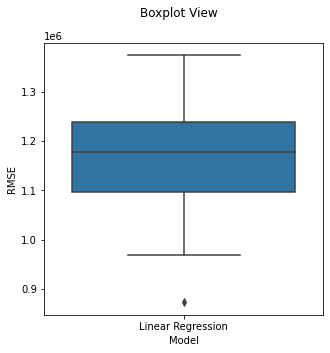

In [105]:
#Model Analysis
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score

models=[]
models.append(('Linear Regression',pipe_lm))

#Model Evaluation
results =[]
names=[]
scoring ='neg_mean_squared_error'
print('Model Evaluation - RMSE')
for name, model in models:
    rkf=RepeatedKFold(n_splits=10, n_repeats=5, random_state=100)
    cv_results = cross_val_score(model,x,y,cv=rkf,scoring=scoring)
    results.append(np.sqrt(-cv_results))
    names.append(name)
    print('{} {:.2f}'.format(name,np.sqrt(-cv_results.mean())))
print('\n')

fig = plt.figure(figsize=(5,5))
fig.suptitle('Boxplot View')
ax = fig.add_subplot(111)
sns.boxplot(data=results)
ax.set_xticklabels(names)
plt.ylabel('RMSE')
plt.xlabel('Model')
plt.show()

In [110]:
#Create Model

from sklearn import metrics

for name,method in [('Linear regression', LinearRegression())]: 
    method.fit(x_train2,y_train)
    predict = method.predict(x_test2)

print('\nOriginal Model')
print('\nMethod: {}'.format(name))   

#Coefficents
print('\nIntercept: {:.2f}'.format(float(method.intercept_)))
coeff_table=pd.DataFrame(np.transpose(method.coef_),dataset.drop(['price'],axis=1).columns,columns=['Coefficients'])
print(coeff_table)
    
#R2,MAE,MSE and RMSE
print('\nR2: {:.2f}'.format(metrics.r2_score(y_test,predict)))
adjusted_r_squared = 1-(1-metrics.r2_score(y_test,predict))*(len(y)-1)/(len(y)-x.shape[1]-1)
print('Adj_R2: {:0.2f}'.format(adjusted_r_squared))
print('Mean Absolute Error: {:.2f}'.format(metrics.mean_absolute_error(y_test, predict)))  
print('Mean Squared Error: {:.2f}'.format(metrics.mean_squared_error(y_test, predict)))  
print('Root Mean Squared Error: {:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, predict))))       


Original Model

Method: Linear regression

Intercept: 4570147.26
               Coefficients
area          635863.459848
bedrooms      268292.507245
bathrooms     524259.024590
mainroad_no  -144014.133068
mainroad_yes  144014.133068

R2: 0.44
Adj_R2: 0.43
Mean Absolute Error: 940998.99
Mean Squared Error: 1443046504402.59
Root Mean Squared Error: 1201268.71
